In [1]:
import sys
import os
import pandas as pd

from bokeh.palettes import Category10


from file_cache.utils.util_pandas import *
from file_cache.cache import file_cache

import matplotlib.pyplot as plt

#Adjust the working folder
file_folder = globals()['_dh'][0]
wk_dir = os.path.dirname(file_folder)
os.chdir(wk_dir)
from core.feature import *
logging.getLogger().setLevel(logging.DEBUG)



2019-01-24 18:32:57,066 util_log.py[61] DEBUG Start the program at:LALI2-M-G0MD, 127.0.0.1, with:Load module


## VIsual predict result

2019-01-24 18:33:00,241 util_log.py[41] INFO get_train_block_all begin with(0 paras) :[], []
2019-01-24 18:33:00,514 util_log.py[49] INFO get_train_block_all cost    0.27 sec:(0 paras)([], []), return:DataFrame, end 
2019-01-24 18:33:00,518 util_log.py[41] INFO get_missing_block_all begin with(0 paras) :[], []
2019-01-24 18:33:00,558 util_log.py[49] INFO get_missing_block_all cost    0.04 sec:(0 paras)([], []), return:DataFrame, end 
2019-01-24 18:33:08,407 util_log.py[41] INFO get_sub_template begin with(0 paras) :[], []
2019-01-24 18:33:08,797 util_log.py[49] INFO get_sub_template cost    0.39 sec:(0 paras)([], []), return:DataFrame, end 
/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  template.drop(columns='sn', errors='ignore', inplace=True)


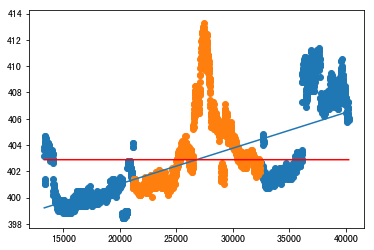

2019-01-24 18:33:17,787 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6664, (2134, 2), (1524, 2), score=0.698


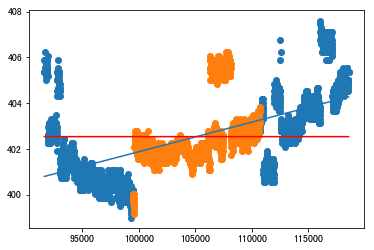

2019-01-24 18:33:17,913 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6666, (2134, 2), (1524, 2), score=0.848


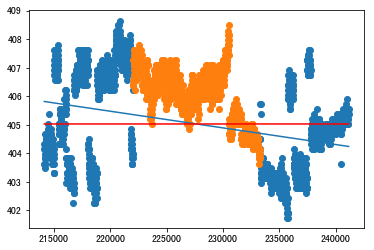

2019-01-24 18:33:18,050 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6668, (2134, 2), (1524, 2), score=0.777


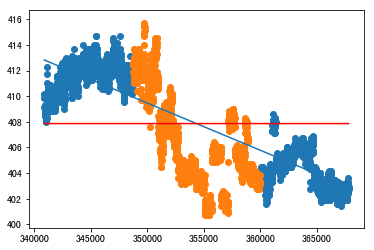

2019-01-24 18:33:18,187 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6670, (2134, 2), (1524, 2), score=0.546


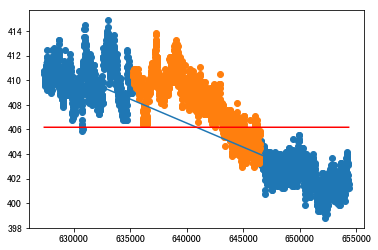

2019-01-24 18:33:18,405 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6674, (2134, 2), (1524, 2), score=0.623


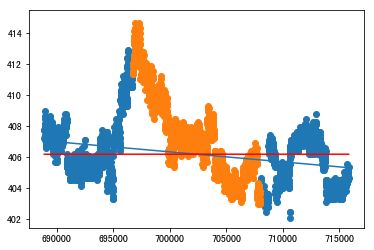

2019-01-24 18:33:18,533 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6676, (2134, 2), (1524, 2), score=0.659


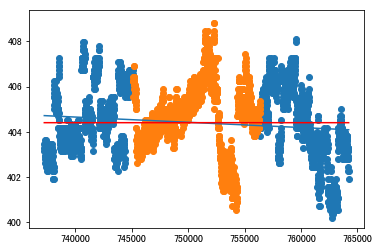

2019-01-24 18:33:18,665 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6678, (2134, 2), (1524, 2), score=0.769


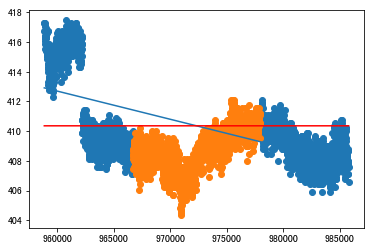

2019-01-24 18:33:18,813 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6680, (2134, 2), (1524, 2), score=0.632


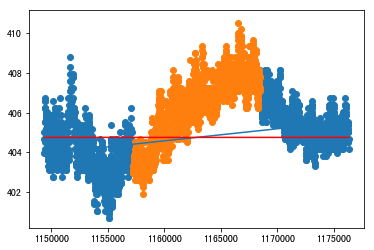

2019-01-24 18:33:18,937 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6684, (2134, 2), (1524, 2), score=0.653


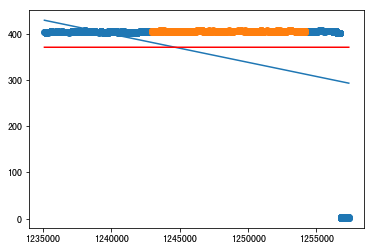

2019-01-24 18:33:19,057 <ipython-input-2-5bb95e59842f>[34] INFO blockid:6686, (1598, 2), (1524, 2), score=0.0


Total loss:0.6205, is_enum:False


In [2]:

logging.getLogger().setLevel(logging.INFO)
import matplotlib.pyplot as plt
col = 'var001'
train_list = get_train_feature(3, col)

train_list = sorted(train_list, key=lambda val: len(val[1]), reverse=True)

count, loss = 0, 0
for train, val, blockid in train_list[:10]:
    is_enum = True if 'int' in date_type[col].__name__ else False
    
#     if is_enum:
#         fn = lambda val:  np.full_like(val,train[col].value_counts().index[0])
#     else:    
#         w = np.polyfit (train.time_sn, train[col], 1)
#         fn = np.poly1d(w)
    fn = get_predict_fun(blockid,train)
    
    for color, data in zip(Category10[5][:2], [train, val]):
        plt.scatter(data.time_sn, data[col], c= color)
    
    x = np.linspace(train.time_sn.min(), train.time_sn.max(), 10000)
    
    
    cur_count, cur_loss = score(val[col], fn(val.time_sn), is_enum)
    
    loss  += cur_loss
    count += cur_count
    
    plt.plot(x, fn(x))    
    plt.plot(x, np.full_like(x, train[col].mean()) , c='r')  
    plt.show()
    logger.info(f'blockid:{blockid}, {train.shape}, {val.shape}, score={round(cur_loss/cur_count,3)}')
print(f'Total loss:{round(loss/count, 4)}, is_enum:{is_enum}')

## Predict submit data

/Users/lali2/Documents/workspace_py/df_jf/core/feature.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  template.drop(columns='sn', errors='ignore', inplace=True)
2019-01-24 18:33:25,618 <ipython-input-3-f4ae09650edf>[10] INFO blockid:1, train:(306, 2)


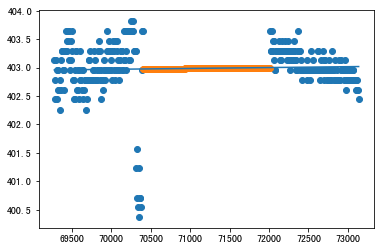

2019-01-24 18:33:25,800 <ipython-input-3-f4ae09650edf>[10] INFO blockid:3, train:(400, 2)


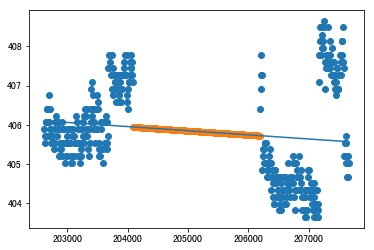

2019-01-24 18:33:25,958 <ipython-input-3-f4ae09650edf>[10] INFO blockid:5, train:(118, 2)


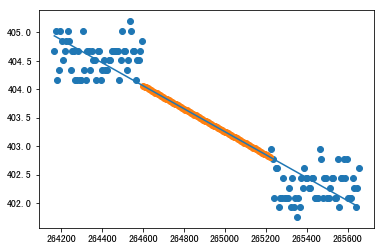

2019-01-24 18:33:26,124 <ipython-input-3-f4ae09650edf>[10] INFO blockid:7, train:(530, 2)


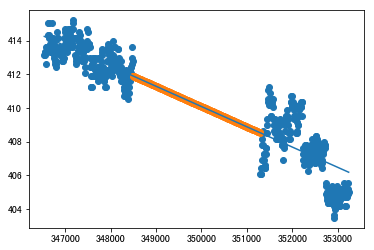

2019-01-24 18:33:26,286 <ipython-input-3-f4ae09650edf>[10] INFO blockid:9, train:(730, 2)


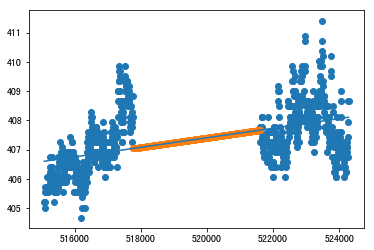

2019-01-24 18:33:26,446 <ipython-input-3-f4ae09650edf>[10] INFO blockid:11, train:(1958, 2)


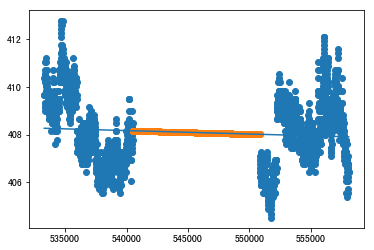

2019-01-24 18:33:26,615 <ipython-input-3-f4ae09650edf>[10] INFO blockid:13, train:(1962, 2)


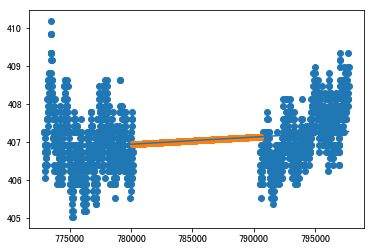

2019-01-24 18:33:26,794 <ipython-input-3-f4ae09650edf>[10] INFO blockid:15, train:(420, 2)


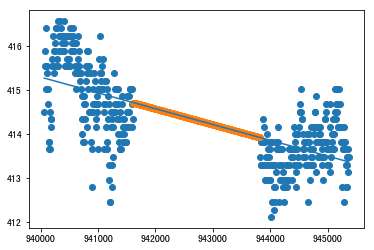

2019-01-24 18:33:26,951 <ipython-input-3-f4ae09650edf>[10] INFO blockid:17, train:(148, 2)


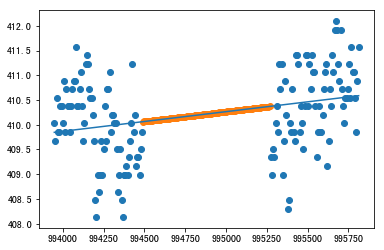

2019-01-24 18:33:27,112 <ipython-input-3-f4ae09650edf>[10] INFO blockid:19, train:(370, 2)


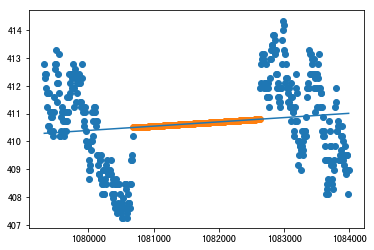

2019-01-24 18:33:27,273 <ipython-input-3-f4ae09650edf>[10] INFO blockid:21, train:(602, 2)


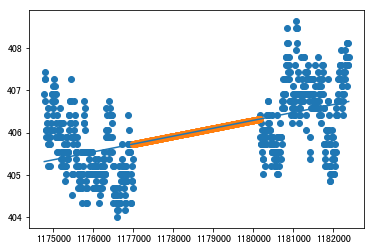

2019-01-24 18:33:27,455 <ipython-input-3-f4ae09650edf>[10] INFO blockid:23, train:(904, 2)


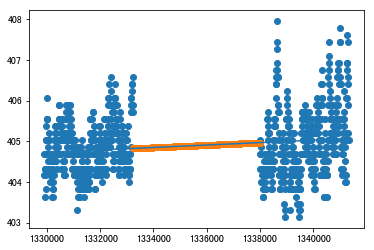

2019-01-24 18:33:27,630 <ipython-input-3-f4ae09650edf>[10] INFO blockid:25, train:(440, 2)


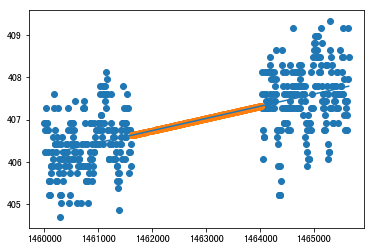

2019-01-24 18:33:27,809 <ipython-input-3-f4ae09650edf>[10] INFO blockid:27, train:(390, 2)


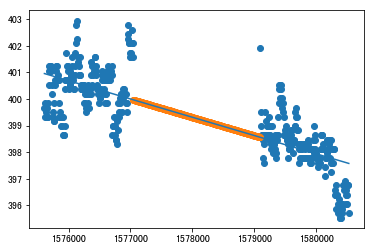

2019-01-24 18:33:27,982 <ipython-input-3-f4ae09650edf>[10] INFO blockid:29, train:(296, 2)


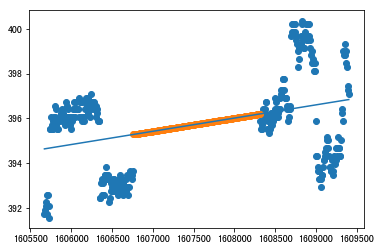

2019-01-24 18:33:28,147 <ipython-input-3-f4ae09650edf>[10] INFO blockid:31, train:(576, 2)


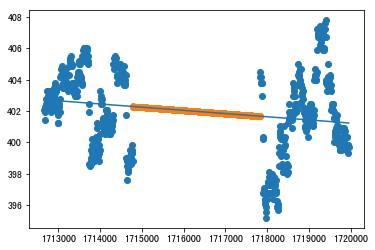

2019-01-24 18:33:28,329 <ipython-input-3-f4ae09650edf>[10] INFO blockid:33, train:(290, 2)


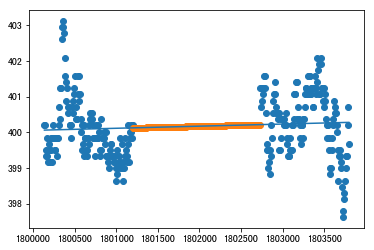

2019-01-24 18:33:28,510 <ipython-input-3-f4ae09650edf>[10] INFO blockid:35, train:(590, 2)


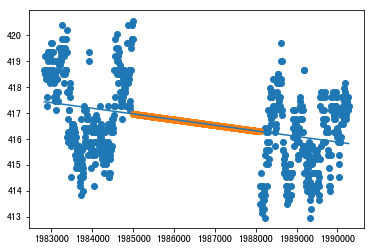

2019-01-24 18:33:28,724 <ipython-input-3-f4ae09650edf>[10] INFO blockid:37, train:(254, 2)


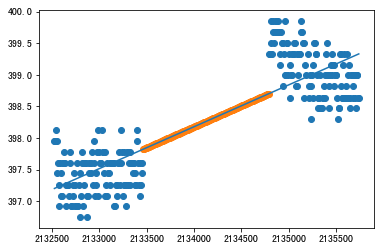

2019-01-24 18:33:28,913 <ipython-input-3-f4ae09650edf>[10] INFO blockid:39, train:(10, 2)


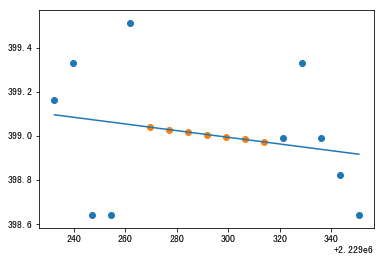

2019-01-24 18:33:29,093 <ipython-input-3-f4ae09650edf>[10] INFO blockid:41, train:(1492, 2)


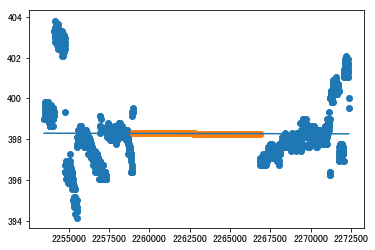

2019-01-24 18:33:29,270 <ipython-input-3-f4ae09650edf>[10] INFO blockid:43, train:(488, 2)


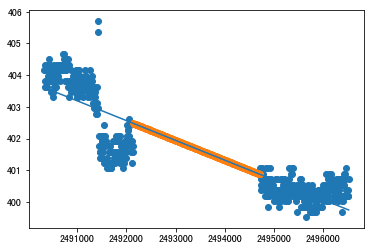

2019-01-24 18:33:29,439 <ipython-input-3-f4ae09650edf>[10] INFO blockid:45, train:(2, 2)


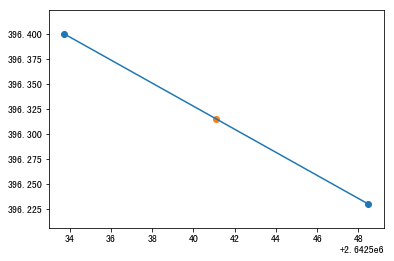

2019-01-24 18:33:29,615 <ipython-input-3-f4ae09650edf>[10] INFO blockid:47, train:(6, 2)


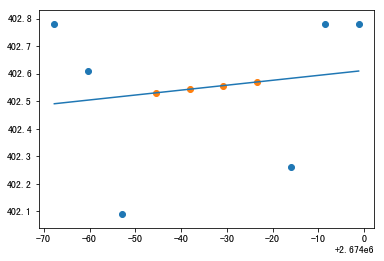

In [3]:


block = get_blocks() 
wtid = 1
col = 'var001'
missing_block = block.loc[(block.wtid == wtid) & (block.col == col) & (block.kind == 'missing')]
missing_block
for blockid, row in missing_block.iterrows():
    train, sub = get_submit_feature_by_block_id(blockid)
    logger.info(f'blockid:{blockid}, train:{train.shape}')
    predict_fn = get_predict_fun(blockid, train)
    predict_res = predict_fn(sub.time_sn)
    sub[col] = predict_res
    
    for color, data in zip(Category10[5][:2], [train, sub]):
        plt.scatter(data.time_sn, data[col], c= color)
    
    x = np.linspace(train.time_sn.min(), train.time_sn.max(), 10000)
    
    
    cur_count, cur_loss = score(sub[col], fn(sub.time_sn), is_enum)
    
    loss  += cur_loss
    count += cur_count
    
    plt.plot(x, predict_fn(x))    
#     plt.plot(x, np.full_like(x, train[col].mean()) , c='r')  
    plt.show()

In [3]:

# @file_cache()
# def get_std_all():
#     df = pd.DataFrame(columns=['wtid', 'col', 'mean', 'min', 'max', 'std'])
#     columns = list(date_type.keys())
#     columns.remove('wtid')
#     columns = sorted(columns)
#     for wtid in sorted(range(1, 34), reverse=True):
#         for col in columns:
#             std_sample =  check_std(wtid,col)
#             df = df.append(std_sample,ignore_index=True)          
#     return df
logging.getLogger().setLevel(logging.INFO)
std  = get_std_all()
std

2019-01-24 16:29:37,400 util_log.py[41] INFO get_std_all begin with(0 paras) :[], []
2019-01-24 16:29:37,434 util_log.py[49] INFO get_std_all cost    0.03 sec:(0 paras)([], []), return:DataFrame, end 


,wtid,col,mean,min,max,std,data_type
0,33,var001,2.324,1.086,4.464,0.829,float64
1,33,var002,2.044,0.301,10.107,2.751,float64
2,33,var003,4.400,0.511,9.908,2.615,float64
3,33,var004,183.756,35.570,345.762,96.610,float64
4,33,var005,2.334,1.101,4.464,0.816,float64
5,33,var006,0.341,0.073,0.659,0.165,float64
6,33,var007,0.388,0.091,0.911,0.200,float64
7,33,var008,0.117,0.000,0.339,0.101,float64
8,33,var009,0.013,0.007,0.029,0.006,float64
9,33,var010,0.011,0.010,0.012,0.001,float64


In [38]:
tmp = std.groupby(['col', 'data_type'])['mean'].mean().sort_values().to_frame().reset_index()
print(tmp.columns)
tmp[tmp['data_type']=='int16']

Index(['col', 'data_type', 'mean'], dtype='object')


,col,data_type,mean
2,var066,int16,0.006545
5,var047,int16,0.007667
16,var053,int16,0.139576
36,var016,int16,0.889091
44,var020,int16,1.758152


In [ ]:
columns = list(date_type.keys())
columns.remove('wtid')
columns = sorted(columns)
for wtid in sorted(range(1, 34), reverse=True):
    for col in columns:
        check_std(wtid,col)

In [62]:
logging.getLogger().setLevel(logging.DEBUG)


get_submit_feature_by_block_id(45)

2019-01-24 18:24:48,053 <ipython-input-62-900ca3af9373>[18] DEBUG wtid:1, col:var001, len:3, std:0.12, blockid:45
2019-01-24 18:24:48,057 <ipython-input-62-900ca3af9373>[22] DEBUG original: (2, 2), (1, 2)
2019-01-24 18:24:48,061 <ipython-input-62-900ca3af9373>[30] DEBUG new(filter by time): (2, 2), (1, 2)


(       time_sn  var001
 0  2642533.754  396.40
 2  2642548.486  396.23,        time_sn  var001
 1  2642541.116     NaN)

In [55]:
get_blocks().iloc[45]

begin         354983
col           var001
distinct         NaN
end           354983
kind         missing
max              NaN
min              NaN
wtid               1
length             1
data_type    float64
Name: 45, dtype: object

In [41]:
get_blocks().iloc[6735]

begin         157660
col           var002
distinct          62
end           173119
kind           train
max               36
min             29.7
wtid               3
length         15460
data_type    float64
Name: 6735, dtype: object

In [48]:

tmp = get_train_ex(3).loc[173119-4000:173119][['time_sn', 'var002']]
tmp.loc[(tmp.time_sn > 1250000) & (tmp.time_sn < 1290000)]

,time_sn,var002
171484,1250005.605,30.10
171485,1250012.971,30.10
171486,1250020.339,30.10
171487,1250027.705,30.10
171488,1250035.068,30.10
171489,1250042.437,30.10
171490,1250049.801,30.10
171491,1250057.167,30.10
171492,1250064.533,30.10
171493,1250071.902,30.10


In [ ]:


feature_list = get_train_feature(1, 'var001')

len(feature_list)

In [ ]:
bk.groupby(['wtid','col']).length.sum()

In [ ]:


def get_missing_block_all():
    """
    wtid, col, begin, end
    :return:
    """
    df = pd.DataFrame(columns=['wtid', 'col', 'begin', 'end'])
    columns = list(date_type.keys())
    columns.remove('wtid')
    columns = sorted(columns)
    for wtid in sorted(range(1, 34), reverse=True):
        for col in columns:
            for begin, end in get_result(wtid, col) :
                df = df.append({'wtid':wtid, 'col':col, 'begin':begin, 'end':end}, ignore_index=True)
    return df

get_missing_block_all()

In [ ]:
 
        
col = 'var003'
get_result(1, col)


In [ ]:
train = get_train_ex(1)
train.iloc[354983-3: 354983+3]

In [ ]:

print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Second run
plt.figure(1)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

# Plot LML landscape
plt.figure(2)
theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()


In [ ]:
tmp['time_sn'] = (tmp.ts - pd.to_datetime('2018-07-01')).astype(int)/1000000000
 
# from datetime import timedelta
# tmp['gap'] = tmp['gap']/timedelta(hours=1)
# #tmp['gap'] = (  pd.to_datetime(tmp.ts2) - pd.to_datetime(tmp.ts) ) #/ np.timedelta64(1, 's')
# tmp.head()
#tmp.gap.astype(int)
tmp

In [ ]:
train = get_train_ex(1) 



missing = train[pd.isna(train['var001'])].index


In [ ]:
tmp.iloc[170590: 170599]

In [ ]:
tmp_1.var001.iloc[200:300].plot()
plot.show()

In [ ]:
tmp_1.var001.dropna().plot()
plot.show()

In [ ]:
len(tmp_1.var003), len(tmp_1.var003.dropna())

In [ ]:
from core.config import date_type
example = pd.read_csv('./input/submit_example.csv', dtype=date_type) 
example.head()


example.var016.drop_duplicates()


In [ ]:
pd.value_counts(example.var016)

In [ ]:
example.var001.iloc[0:3].astype(str)

In [ ]:
example.var001.iloc[0:3].apply(lambda val : True if val==405.37 else False)

In [ ]:
example.head()

In [ ]:
plt.show()

In [ ]:
from core import feature

In [ ]:

template = pd.read_csv('./input/template_submit_result.csv') 

print(template.shape)
#template 

In [ ]:

template = pd.read_csv('./input/template_submit_result.csv') 

train = pd.read_csv('./input/001/201807.csv') 
print(train.shape)

template = template.set_index(['ts', 'wtid'])
train = train.set_index(['ts', 'wtid'])


train = train[train.index.isin(template.index)]

train.shape

tmp = template.combine_first(train)
print(tmp.shape)


In [ ]:

 

tmp = get_sub_template()

tmp.head()

In [ ]:
tmp = get_sub_template()


In [ ]:
tmp.head(100)

In [ ]:
train_01 = pd.read_csv('./input/001/201807.csv') 
train_01.head()
#del train_01




In [ ]:
from core.feature import *
df = get_missing_analysis()

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.var001[:1].describe()

In [ ]:
df.var001.astype(int).std()

In [ ]:
np.finfo(np.float16).max

In [ ]:

def get_analysis_enum():
    col_list = ['wtid','var053','var066','var016','var020','var047',  ]

    train_list = []
    for wtid in range(1, 34):
        wtid = str(wtid)
        train = pd.read_csv(f"./input/{wtid.rjust(3,'0')}/201807.csv", usecols=col_list)
        train = train.groupby(col_list).agg({'wtid':'count'})
        train.rename(index=str, columns={"wtid": "count"}, inplace=True)
        train = train.reset_index()
        print(train.shape)
        train_list.append(train)

    all = pd.concat(train_list)
    return all

enum_type = get_analysis_enum()

In [ ]:
tmp = enum_type[['var053','var066','var016','var020','var047',]].drop_duplicates(['var053','var066','var016','var020','var047',])

In [ ]:
enum_type.sort_values(['wtid', 'count', ], ascending=False)

In [ ]:
for i in sorted((range(1, 34)),reverse=True):
    print(i)